<a href="https://www.kaggle.com/code/klaidenx/spotify-yout-eda?scriptVersionId=131912097" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#Data Manipulation
import numpy as np
import pandas as pd 
#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

%matplotlib inline

/kaggle/input/spotify-and-youtube/Spotify_Youtube.csv


In [2]:
class COLORS:
    BLUE="#A6D0DD"
    RED="#FF6969"
    BEIGE="#FFD3B0"
    BEI="#FFF9DE"
    DARKB="#3C486B"
    YELLOW="#F9D949"
    RRED="#F45050"
    ORANGE="#FF6000"

In [3]:
#Reading Data
df_ys=pd.read_csv("/kaggle/input/spotify-and-youtube/Spotify_Youtube.csv",index_col="Unnamed: 0")

## Information About The Data

In [4]:
#Counting Columns
columns=df_ys.columns[1:]
print("There are {} Columns in The Dataset Which Are {}".format(columns.nunique(),[_ for _ in columns]))

There are 26 Columns in The Dataset Which Are ['Url_spotify', 'Track', 'Album', 'Album_type', 'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes', 'Comments', 'Description', 'Licensed', 'official_video', 'Stream']


In [5]:
#Drop The Url Columns 
drop_cols=["Url_spotify","Uri","Url_youtube","Description","Title"]
df_ys.drop(columns=drop_cols,inplace=True)
df_ys.reset_index()

,index,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,...,Valence,Tempo,Duration_ms,Channel,Views,Likes,Comments,Licensed,official_video,Stream
0,0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,...,0.7720,138.559,222640.0,Gorillaz,693555221.0,6220896.0,169907.0,True,True,1.040235e+09
1,1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,...,0.8520,92.761,200173.0,Gorillaz,72011645.0,1079128.0,31003.0,True,True,3.100837e+08
2,2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.0,-3.930,0.0522,...,0.5510,108.014,215150.0,Gorillaz,8435055.0,282142.0,7399.0,True,True,6.306347e+07
3,3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,2.0,-5.810,0.0260,...,0.5780,120.423,233867.0,Gorillaz,211754952.0,1788577.0,55229.0,True,True,4.346636e+08
4,4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,10.0,-8.627,0.1710,...,0.5250,167.953,340920.0,Gorillaz,618480958.0,6197318.0,155930.0,True,True,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,20713,SICK LEGEND,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,0.582,0.926,5.0,-6.344,0.0328,...,0.6580,90.002,94667.0,SICK LEGEND - Topic,71678.0,1113.0,0.0,True,True,9.227144e+06
20714,20714,SICK LEGEND,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,0.531,0.936,4.0,-1.786,0.1370,...,0.6570,174.869,150857.0,SICK LEGEND - Topic,164741.0,2019.0,0.0,True,True,1.089818e+07
20715,20715,SICK LEGEND,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,0.443,0.830,4.0,-4.679,0.0647,...,0.4190,168.388,136842.0,SICK LEGEND - Topic,35646.0,329.0,0.0,True,True,6.226110e+06
20716,20716,SICK LEGEND,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,0.417,0.767,9.0,-4.004,0.4190,...,0.5390,155.378,108387.0,SICK LEGEND - Topic,6533.0,88.0,0.0,True,True,6.873961e+06


In [6]:
df_ys.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20718 entries, 0 to 20717
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20718 non-null  object 
 1   Track             20718 non-null  object 
 2   Album             20718 non-null  object 
 3   Album_type        20718 non-null  object 
 4   Danceability      20716 non-null  float64
 5   Energy            20716 non-null  float64
 6   Key               20716 non-null  float64
 7   Loudness          20716 non-null  float64
 8   Speechiness       20716 non-null  float64
 9   Acousticness      20716 non-null  float64
 10  Instrumentalness  20716 non-null  float64
 11  Liveness          20716 non-null  float64
 12  Valence           20716 non-null  float64
 13  Tempo             20716 non-null  float64
 14  Duration_ms       20716 non-null  float64
 15  Channel           20248 non-null  object 
 16  Views             20248 non-null  float6

In [7]:
#Highest Occurence Values
high_cols=df_ys.select_dtypes(include="float64").columns.to_list()
high_occ=df_ys[high_cols].value_counts().idxmax()
for occ,high in tqdm(zip(high_cols,high_occ)):
    print("Most Occuring Value In {} And It's {}".format(occ,high))

15it [00:00, 31920.12it/s]

Most Occuring Value In Danceability And It's 0.276
Most Occuring Value In Energy And It's 0.572
Most Occuring Value In Key And It's 1.0
Most Occuring Value In Loudness And It's -7.818
Most Occuring Value In Speechiness And It's 0.0377
Most Occuring Value In Acousticness And It's 0.641
Most Occuring Value In Instrumentalness And It's 0.0
Most Occuring Value In Liveness And It's 0.2
Most Occuring Value In Valence And It's 0.285
Most Occuring Value In Tempo And It's 77.986
Most Occuring Value In Duration_ms And It's 237467.0
Most Occuring Value In Views And It's 764831.0
Most Occuring Value In Likes And It's 5730.0
Most Occuring Value In Comments And It's 472.0
Most Occuring Value In Stream And It's 169769959.0


In [8]:
#Missing Values
missing_values=df_ys.isnull().sum().to_list()
print("There Is A Total Of {} Missing Variables"\
      .format(df_ys.isnull().sum().sum()))

#Only Count The Missing Variables
for val,cat in tqdm(zip(missing_values,df_ys.columns)):
    if val > 0:
        print("{} Has {} Missing Variables".format(cat,val))

There Is A Total Of 3588 Missing Variables


0it [00:00, ?it/s]

Danceability Has 2 Missing Variables
Energy Has 2 Missing Variables
Key Has 2 Missing Variables
Loudness Has 2 Missing Variables
Speechiness Has 2 Missing Variables
Acousticness Has 2 Missing Variables
Instrumentalness Has 2 Missing Variables
Liveness Has 2 Missing Variables
Valence Has 2 Missing Variables
Tempo Has 2 Missing Variables
Duration_ms Has 2 Missing Variables
Channel Has 470 Missing Variables
Views Has 470 Missing Variables
Likes Has 541 Missing Variables
Comments Has 569 Missing Variables
Licensed Has 470 Missing Variables
official_video Has 470 Missing Variables
Stream Has 576 Missing Variables


22it [00:00, 43484.77it/s]


In [9]:
#Drop The Columns That Only Have Two Missing Values
num_cols_drop=[col for col in df_ys.columns if df_ys[col].isna().sum() == 2]
df_ys.dropna(subset=num_cols_drop,inplace=True)
#Fill Numerical Values
num_cols_fill=["Views","Likes","Comments","Stream"]
df_ys[num_cols_fill]=df_ys[num_cols_fill].fillna(method="ffill",axis=0)
#Fill Categorical Values
cat_cols_fill=["Channel","Licensed","official_video"]
df_ys[cat_cols_fill]=df_ys[cat_cols_fill].fillna(method="ffill",axis=0)

In [10]:
df_ys["Liveness"]

0        0.6130
1        0.0463
2        0.1160
3        0.0640
4        0.0698
          ...  
20713    0.0839
20714    0.0923
20715    0.1540
20716    0.1080
20717    0.1360
Name: Liveness, Length: 20716, dtype: float64

In [11]:
#Correcting The Data Type Of The Columns
df_ys['Likes'] = pd.to_numeric(df_ys['Likes'], errors='coerce')
df_ys['Comments'] = pd.to_numeric(df_ys['Comments'], errors='coerce')
df_ys['Views'] = pd.to_numeric(df_ys['Views'], errors='coerce')
df_ys['Stream'] = pd.to_numeric(df_ys['Stream'], errors='coerce')

In [12]:
df_ys.describe().T.style.background_gradient(cmap='YlOrRd',axis=0,low=.25,high=.95)

,count,mean,std,min,25%,50%,75%,max
Danceability,20716.000000,0.619777,0.165272,0.000000,0.518000,0.637000,0.740250,0.975000
Energy,20716.000000,0.635250,0.214147,0.000020,0.507000,0.666000,0.798000,1.000000
Key,20716.000000,5.300348,3.576449,0.000000,2.000000,5.000000,8.000000,11.000000
Loudness,20716.000000,-7.671680,4.632749,-46.251000,-8.858000,-6.536000,-4.931000,0.920000
Speechiness,20716.000000,0.096456,0.111960,0.000000,0.035700,0.050500,0.103000,0.964000
Acousticness,20716.000000,0.291535,0.286299,0.000001,0.045200,0.193000,0.477250,0.996000
Instrumentalness,20716.000000,0.055962,0.193262,0.000000,0.000000,0.000002,0.000463,1.000000
Liveness,20716.000000,0.193521,0.168531,0.014500,0.094100,0.125000,0.237000,1.000000
Valence,20716.000000,0.529853,0.245441,0.000000,0.339000,0.537000,0.726250,0.993000
Tempo,20716.000000,120.638340,29.579018,0.000000,97.002000,119.965000,139.935000,243.372000


In [13]:
df_ys.shape
train_df=df_ys.iloc[:int(np.round(df_ys.shape[0]*.85)),:]
test_df=df_ys.iloc[:int(np.round(df_ys.shape[0]*.15)),:]
print(f"There are {train_df.shape[0]} Training Data And {test_df.shape[0]} Testing Data")

There are 17609 Training Data And 3107 Testing Data


## EDA

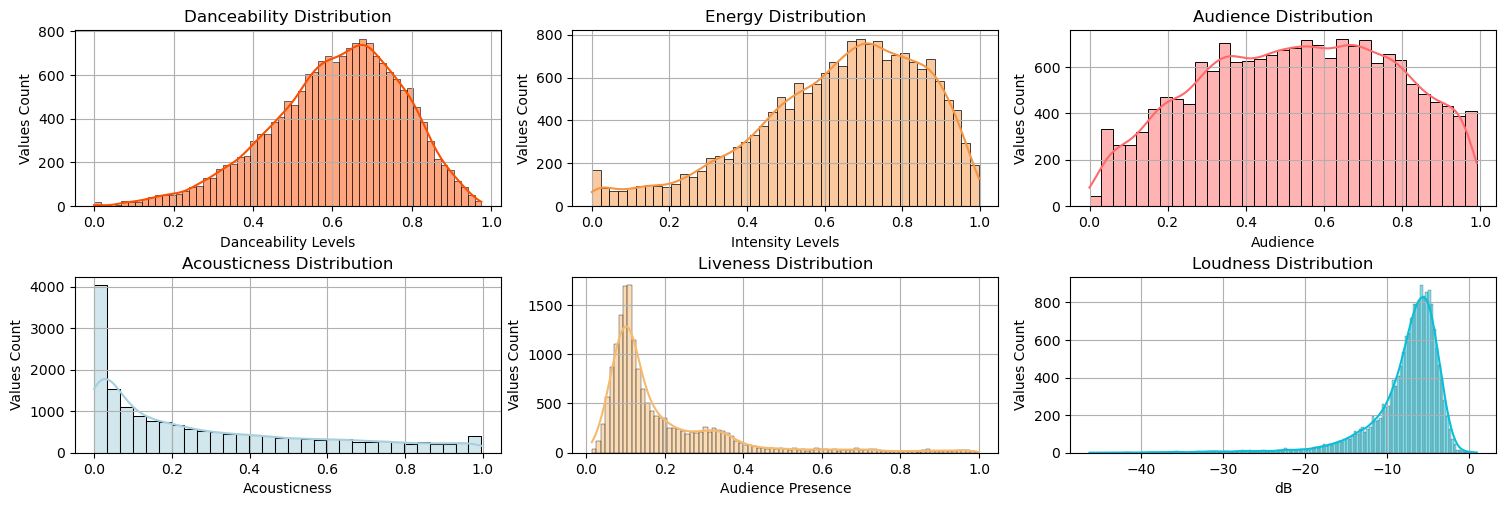

In [14]:
fig,axs=plt.subplots(2,3,figsize=(15,5))

sns.histplot(ax=axs[0,0],data=train_df,x="Danceability",kde=True,color="#FC4F00")
axs[0,0].set_title("Danceability Distribution")
axs[0,0].set_xlabel("Danceability Levels")
axs[0,0].set_ylabel("Values Count")
axs[0,0].grid(True)

sns.histplot(ax=axs[0,1],data=train_df,x="Energy",kde=True,color="#F79540")
axs[0,1].set_title("Energy Distribution")
axs[0,1].set_xlabel("Intensity Levels")
axs[0,1].set_ylabel("Values Count")
axs[0,1].grid(True)

sns.histplot(ax=axs[0][2],data=train_df,x="Valence",kde=True,color="#FF6969")
axs[0,2].set_title("Audience Distribution")
axs[0,2].set_xlabel("Audience")
axs[0,2].set_ylabel("Values Count")
axs[0,2].grid(True)

sns.histplot(ax=axs[1,0],data=train_df,x="Acousticness",kde=True,color="#A6D0DD")
axs[1,0].set_title("Acousticness Distribution")
axs[1,0].set_xlabel("Acousticness")
axs[1,0].set_ylabel("Values Count")
axs[1,0].grid(True)

sns.histplot(ax=axs[1,1],data=train_df,x="Liveness",kde=True,color="#F6BA6F")
axs[1,1].set_title("Liveness Distribution")
axs[1,1].set_xlabel("Audience Presence")
axs[1,1].set_ylabel("Values Count")
axs[1,1].grid(True)

sns.histplot(ax=axs[1,2],data=train_df,x="Loudness",kde=True,color="#05BFDB")
axs[1,2].set_title("Loudness Distribution")
axs[1,2].set_xlabel("dB")
axs[1,2].set_ylabel("Values Count")
axs[1,2].grid(True)

plt.tight_layout(pad=.5)

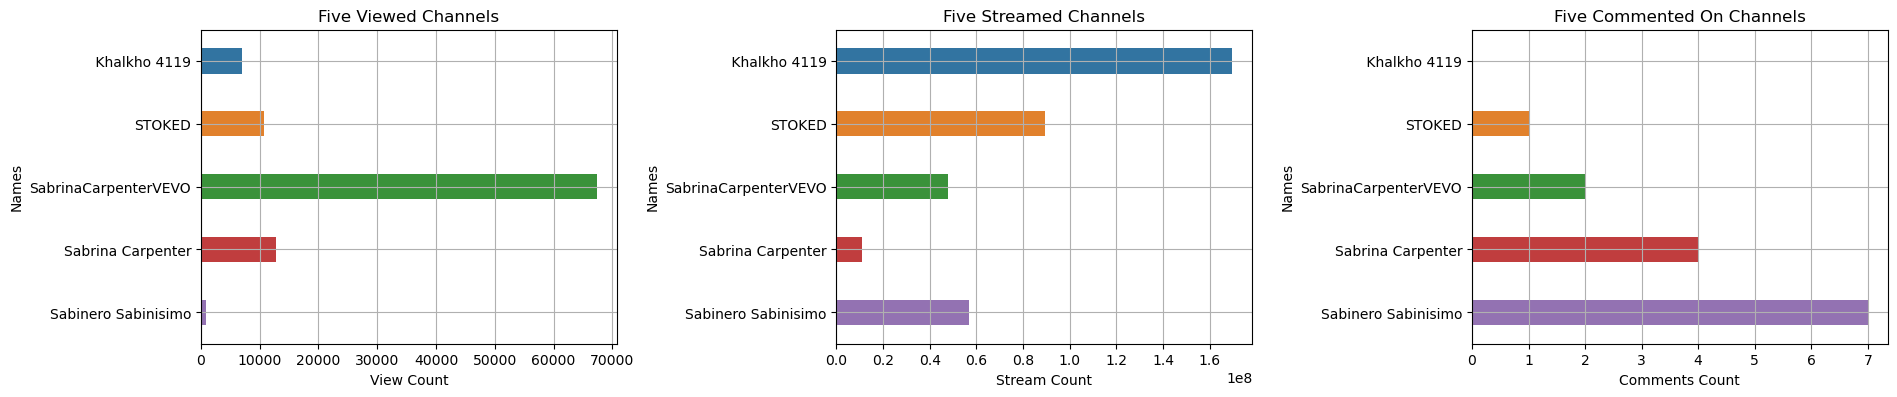

In [15]:
fig,axs=plt.subplots(1,3,figsize=(19,4))

channel_views=train_df.groupby(["Channel"]).agg({"Views":"median"})
channel_views.reset_index(inplace=True)

sns.barplot(ax=axs[0],data=channel_views,x=channel_views["Views"].value_counts().index[:5]\
            ,y=channel_views["Channel"].value_counts().index[:5],width=.4)
axs[0].set_title("Five Viewed Channels")
axs[0].set_xlabel("View Count")
axs[0].set_ylabel("Names")
axs[0].grid(True)

sns.barplot(ax=axs[1],data=train_df,x=train_df["Stream"].value_counts().index[:5]\
            ,y=channel_views["Channel"].value_counts().index[:5],width=.4)
axs[1].set_title("Five Streamed Channels")
axs[1].set_xlabel("Stream Count")
axs[1].set_ylabel("Names")
axs[1].grid(True)


sns.barplot(ax=axs[2],data=train_df,x=train_df["Comments"].value_counts().index[:5]\
            ,y=channel_views["Channel"].value_counts().index[:5],width=.4)
axs[2].set_title("Five Commented On Channels")
axs[2].set_xlabel("Comments Count")
axs[2].set_ylabel("Names")
axs[2].grid(True)

plt.tight_layout(pad=0.8)

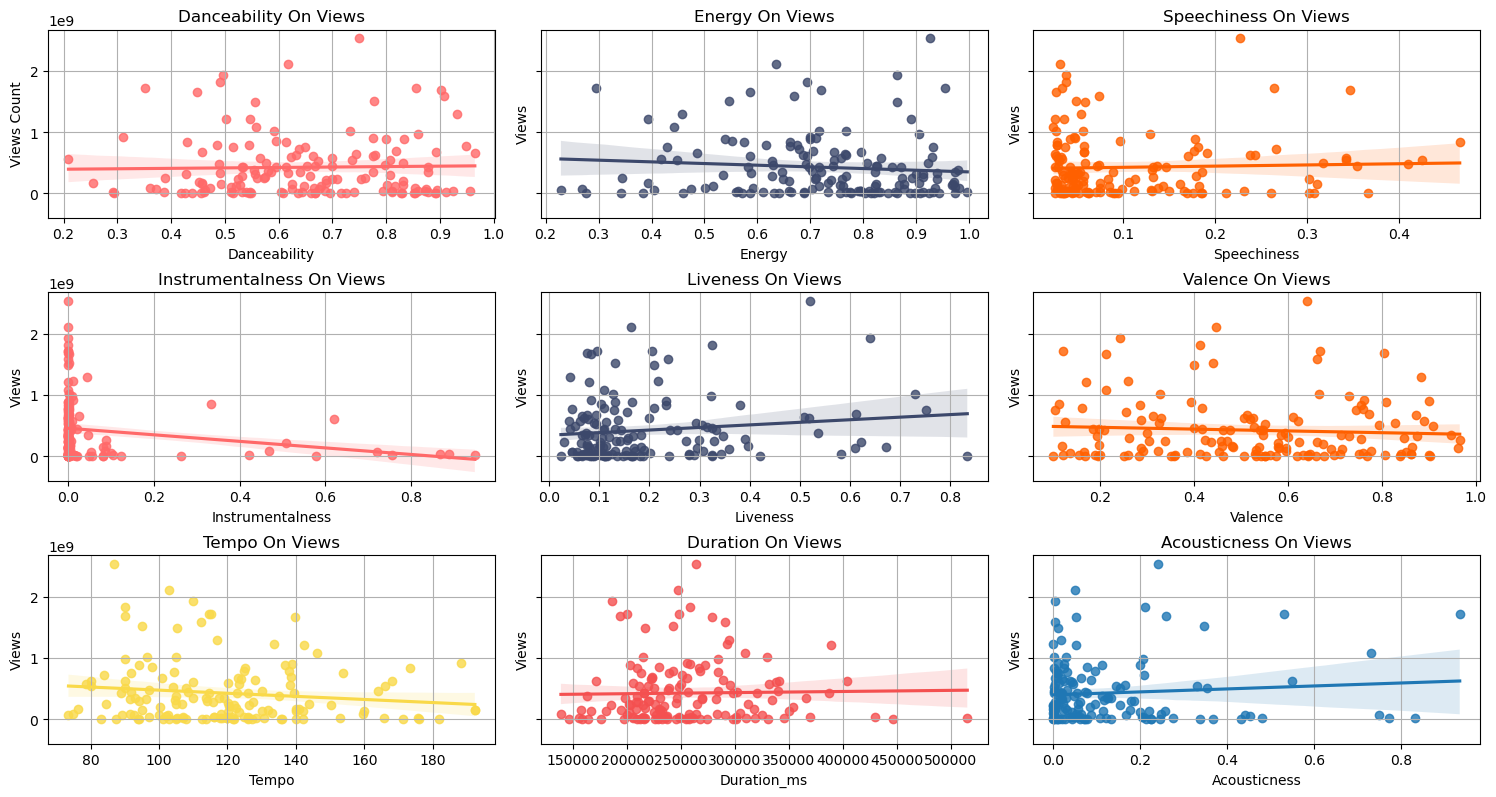

In [16]:
fig,axs=plt.subplots(3,3,figsize=(15,8),sharey=True)

sns.regplot(ax=axs[0,0],data=train_df,x=train_df["Danceability"][:150],y=train_df["Views"][:150],color=COLORS.RED)
axs[0,0].set_title("Danceability On Views")
axs[0,0].set_ylabel("Views Count")
axs[0,0].grid(True)

sns.regplot(ax=axs[0,1],data=train_df,x=train_df["Energy"][:150],y=train_df["Views"][:150],color=COLORS.DARKB)
axs[0,1].set_title("Energy On Views")
axs[0,1].grid(True)

sns.regplot(ax=axs[0,2],data=train_df,x=train_df["Speechiness"][:150],y=train_df["Views"][:150],color=COLORS.ORANGE)
axs[0,2].set_title("Speechiness On Views")
axs[0,2].grid(True)

sns.regplot(ax=axs[1,0],data=train_df,x=train_df["Instrumentalness"][:150],y=train_df["Views"][:150],color=COLORS.RED)
axs[1,0].set_title("Instrumentalness On Views")
axs[1,0].grid(True)

sns.regplot(ax=axs[1,1],data=train_df,x=train_df["Liveness"][:150],y=train_df["Views"][:150],color=COLORS.DARKB)
axs[1,1].set_title("Liveness On Views")
axs[1,1].grid(True)

sns.regplot(ax=axs[1,2],data=train_df,x=train_df["Valence"][:150],y=train_df["Views"][:150],color=COLORS.ORANGE)
axs[1,2].set_title("Valence On Views")
axs[1,2].grid(True)

sns.regplot(ax=axs[2,0],data=train_df,x=train_df["Tempo"][:150],y=train_df["Views"][:150],color=COLORS.YELLOW)
axs[2,0].set_title("Tempo On Views")
axs[2,0].grid(True)

sns.regplot(ax=axs[2,1],data=train_df,x=train_df["Duration_ms"][:150],y=train_df["Views"][:150],color=COLORS.RRED)
axs[2,1].set_title("Duration On Views")
axs[2,1].grid(True)

sns.regplot(ax=axs[2,2],data=train_df,x=train_df["Acousticness"][:150],y=train_df["Views"][:150])
axs[2,2].set_title("Acousticness On Views")
axs[2,2].grid(True)

plt.tight_layout(pad=.8)

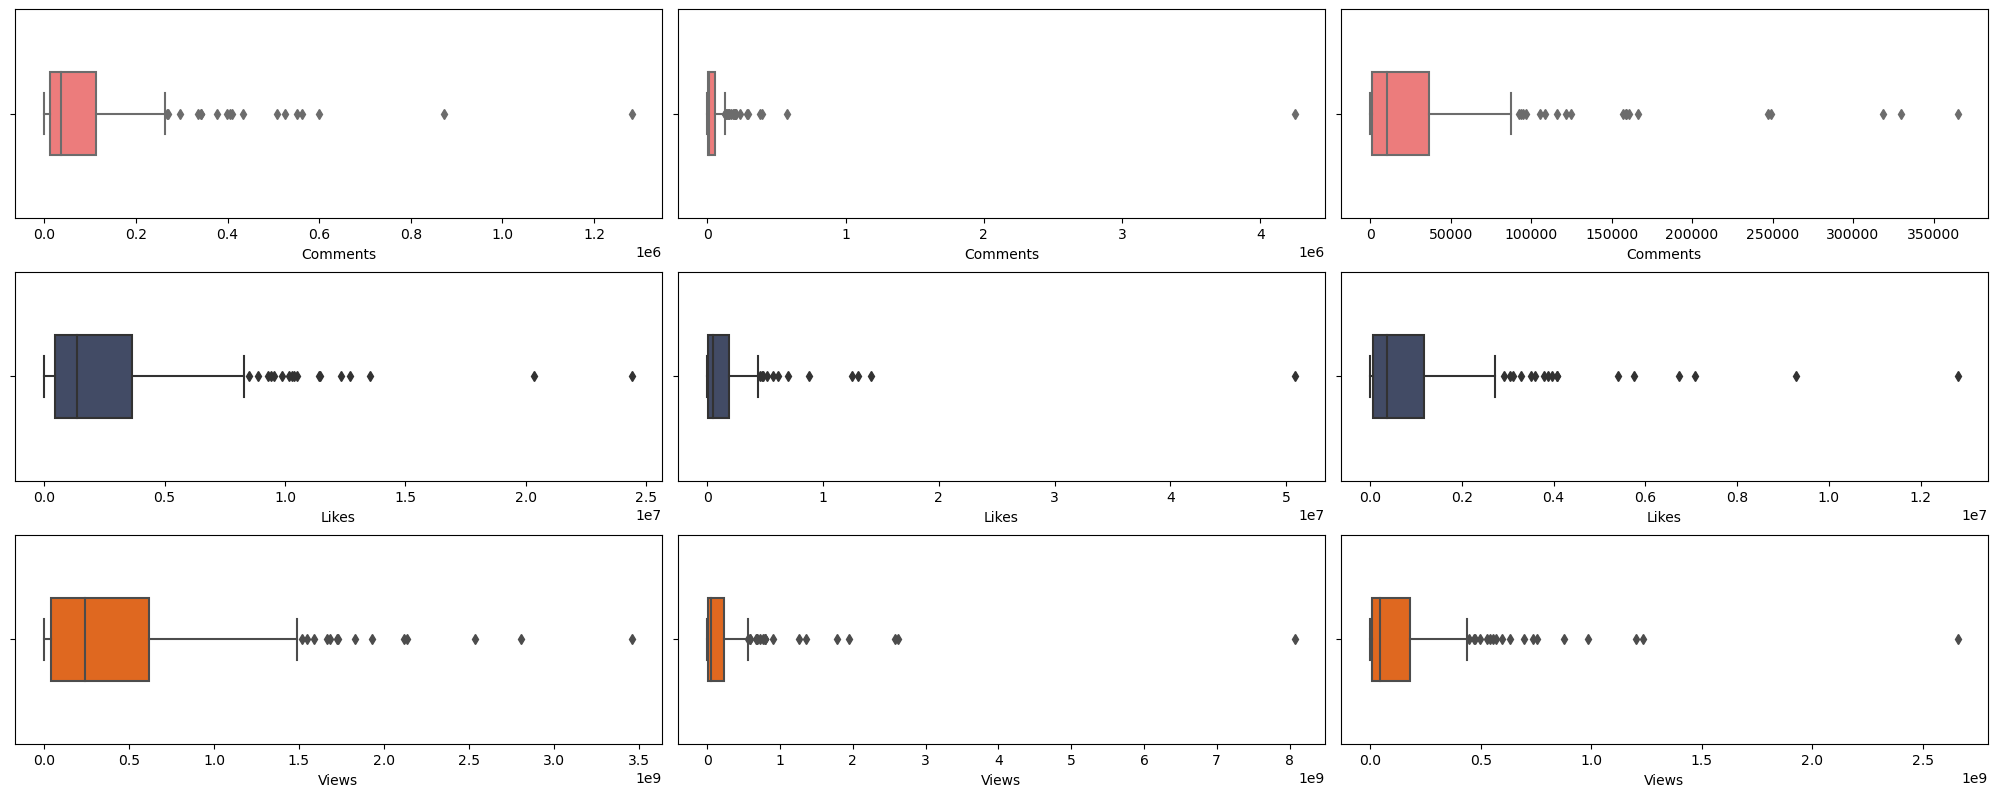

In [17]:
fig,axs=plt.subplots(3,3,figsize=(20,8))

sns.boxplot(ax=axs[0,0],data=train_df,x=train_df["Comments"][:200],width=.4,color=COLORS.RED)
sns.boxplot(ax=axs[0,1],data=train_df,x=train_df["Comments"][201:400],width=.4,color=COLORS.RED)
sns.boxplot(ax=axs[0,2],data=train_df,x=train_df["Comments"][401:600],width=.4,color=COLORS.RED)


sns.boxplot(ax=axs[1,0],data=train_df,x=train_df["Likes"][:200],width=.4,color=COLORS.DARKB)
sns.boxplot(ax=axs[1,1],data=train_df,x=train_df["Likes"][201:400],width=.4,color=COLORS.DARKB)
sns.boxplot(ax=axs[1,2],data=train_df,x=train_df["Likes"][401:600],width=.4,color=COLORS.DARKB)

sns.boxplot(ax=axs[2,0],data=train_df,x=train_df["Views"][:200],width=.4,color=COLORS.ORANGE)
sns.boxplot(ax=axs[2,1],data=train_df,x=train_df["Views"][201:400],width=.4,color=COLORS.ORANGE)
sns.boxplot(ax=axs[2,2],data=train_df,x=train_df["Views"][401:600],width=.4,color=COLORS.ORANGE)


plt.tight_layout(pad=.8)